In [1]:
import torch
import torch.nn as nn
from src.utils.flow import LinearFlow, FlowSimulator_onehot
from src.utils.trainer import IsingFlowTrainer
from architecture.nn_models import VelocityField_onehot
from src.utils.dataset import IsingSampler, GaussianBaseSampler
from matplotlib import pyplot as plt
import torch.nn.functional as F

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Path to training data (adjust as needed)
h5path = "../../data/gridstates_0.588_0.100.hdf5"

Using device: cuda


In [3]:
# Create samplers
sampler = IsingSampler(h5path, device=device)
base = GaussianBaseSampler(channels=1, height=64, width=64)

# Create flow and model
flow = LinearFlow(sampler, base)
model = VelocityField_onehot(L=64, dims=2)

# Create trainer
trainer = IsingFlowTrainer(flow, model)

Loaded 332800 grids and attributes into memory.
Elapsed time: 2.03 s


In [4]:
# Train the model
print("Starting training...")
trainer.train_onehot(num_epochs=100, device=device, lr=1e-3, batch_size=32)
print("Training completed.")

Starting training...


Epoch 99, loss: 0.4944072961807251: 100%|██████████| 100/100 [00:01<00:00, 60.04it/s]


Training completed.


Sampling from trained model...
torch.Size([1, 2, 64, 64])
1
torch.Size([1, 1, 2, 64, 64])
Generated samples shape: torch.Size([1, 1, 2, 64, 64])


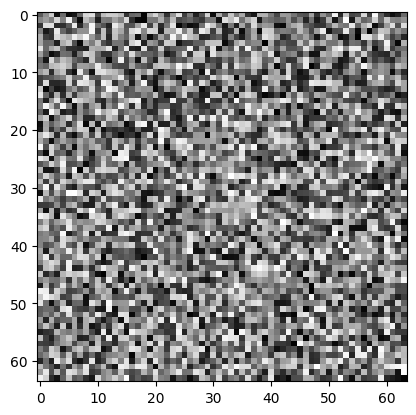

In [ ]:
# Optional: Sample some data after training
print("Sampling from trained model...")
with torch.no_grad():
    simulator = FlowSimulator_onehot(model)
    num_samples = 1
    num_steps = 10
    g0 = torch.randn([num_samples, 2, 64, 64], device=device)
    x_init = F.softmax(g0, dim=1)
    print(x_init.shape)
    ts = torch.linspace(0, 1, num_steps + 1, device=device).repeat(num_samples, 1, 1, 1, 1)
    print(ts.shape)
    generated = simulator.simulate(x_init, ts)
    print(generated.shape)
    print(f"Generated samples shape: {generated.shape}")
    plt.imshow(generated[-1, -1, 0].cpu(), cmap='gray')
    plt.show()